In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [77]:
bank=pd.read_csv("/home/shruti/Downloads/bank.csv",sep=";")
#print(data.head())
#print(data.shape)
print(bank.corr())


               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


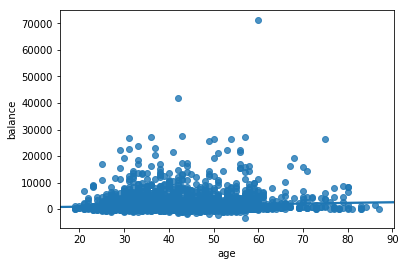

In [78]:
sns.regplot(x="age",y="balance",data=bank)

In [79]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [80]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


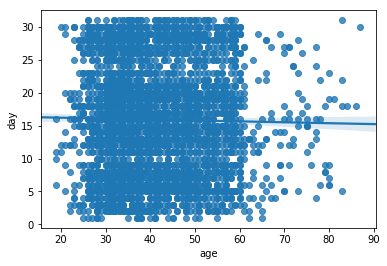

In [81]:
sns.regplot(x="age",y="day",data=bank)

In [82]:
bank.columns.values


array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [83]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [84]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [85]:
bank['y']=(bank['y']=='yes').astype(int)

In [86]:
bank['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [87]:
print(bank['education'])

0         primary
1       secondary
2        tertiary
3        tertiary
4       secondary
5        tertiary
6        tertiary
7       secondary
8        tertiary
9         primary
10      secondary
11      secondary
12       tertiary
13      secondary
14      secondary
15       tertiary
16      secondary
17       tertiary
18        primary
19      secondary
20        unknown
21       tertiary
22      secondary
23      secondary
24       tertiary
25       tertiary
26        primary
27        unknown
28      secondary
29      secondary
          ...    
4491    secondary
4492    secondary
4493     tertiary
4494    secondary
4495     tertiary
4496    secondary
4497     tertiary
4498     tertiary
4499      primary
4500    secondary
4501     tertiary
4502    secondary
4503      primary
4504    secondary
4505    secondary
4506     tertiary
4507    secondary
4508      unknown
4509     tertiary
4510    secondary
4511    secondary
4512    secondary
4513    secondary
4514    secondary
4515    se

In [88]:
bank['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [89]:
bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [90]:
bank.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,0.094395
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,0.106245
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,0.142963
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,0.101604


Text(0,0.5,'Freqency of purchase')

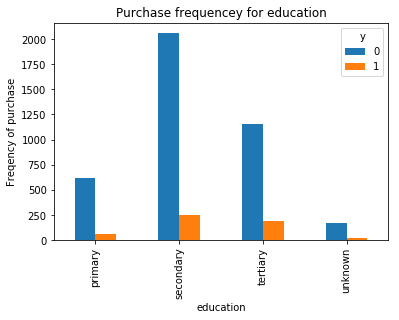

In [91]:
pd.crosstab(bank.education,bank.y).plot(kind='bar')
plt.title("Purchase frequencey for education")
plt.xlabel("education")
plt.ylabel("Freqency of purchase")

Text(0,0.5,'Frequencey')

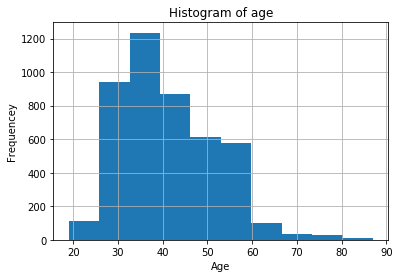

In [92]:
bank.age.hist() 
plt.title('Histogram of age') 
plt.xlabel('Age') 
plt.ylabel('Frequencey')

Text(0,0.5,'Proportion of customers')

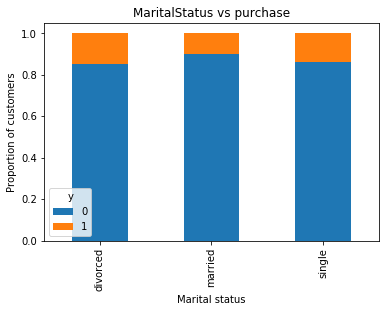

In [93]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('MaritalStatus vs purchase')
plt.xlabel('Marital status')
plt.ylabel('Proportion of customers')

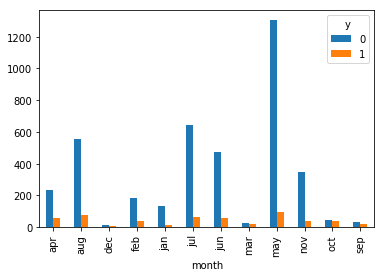

In [94]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')

Text(0,0.5,'Frequencey')

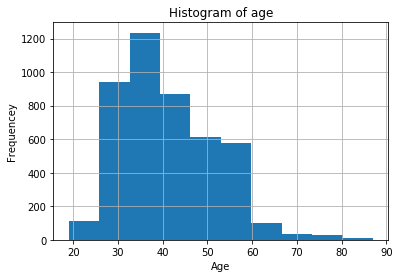

In [95]:
bank.age.hist()
plt.title('Histogram of age')
plt.xlabel('Age') 
plt.ylabel('Frequencey')

bank.age.hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequencey')

In [96]:
cat_var=['job','marital','education','default','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
for var in cat_var:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(bank[var],prefix=var)
    bank1=bank.join(cat_list)
    bank=bank1

In [97]:
bank_vars=bank.columns.values.tolist()
to_keep=[i for i in bank_vars if i not in cat_var]

In [98]:
bank_final=bank[to_keep]
bank_final.head()

,age,balance,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,previous_19,previous_20,previous_22,previous_23,previous_24,previous_25,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,33,4789,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,35,1350,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,59,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
bank_final.columns.values

array(['age', 'balance', 'y', ..., 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [100]:
bank_final_vars=bank_final.columns.values.tolist()
bank_final_vars

['age',
 'balance',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'day_7',
 'day_8',
 'day_9',
 'day_10',
 'day_11',
 'day_12',
 'day_13',
 'day_14',
 'day_15',
 'day_16',
 'day_17',
 'day_18',
 'day_19',
 'day_20',
 'day_21',
 'day_22',
 'day_23',
 'day_24',
 'day_25',
 'day_26',
 'day_27',
 'day_28',
 'day_29',
 'day_30',
 'day_31',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may

In [101]:
Y=bank_final['y']
X=[i for i in bank_final_vars if i not in Y]
print(bank_final[X])
print(Y)

      age  balance  y  job_admin.  job_blue-collar  job_entrepreneur  \
0      30     1787  0           0                0                 0   
1      33     4789  0           0                0                 0   
2      35     1350  0           0                0                 0   
3      30     1476  0           0                0                 0   
4      59        0  0           0                1                 0   
5      35      747  0           0                0                 0   
6      36      307  0           0                0                 0   
7      39      147  0           0                0                 0   
8      41      221  0           0                0                 1   
9      43      -88  0           0                0                 0   
10     39     9374  0           0                0                 0   
11     43      264  0           1                0                 0   
12     36     1109  0           0                0              

In [104]:
X_train,y_train,X_test,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1301, 4521]

[[1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9]]
